In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import collections
import functools
import seaborn as sns
from scipy.interpolate import interp1d

sns.set_context('poster')
sns.set_style('ticks')
sns.set_palette('Paired', 25)
colors = sns.color_palette('Paired', 25)

# Compute number of potential neighbours of types D, E around beads A

## no water

In [2]:
data = []
conversion = {}
max_size = []
path = 'no_water'
for f in os.listdir(path):
    if f.endswith('csv') and 'energy' in f:
        d = np.loadtxt(os.path.join(path, f), skiprows=1)
        pid = f.split('_')[2]
        conversion[pid] = d
        header = open(os.path.join(path, f)).readline().split()
        conversion[pid].dtype = [(x, np.float) for x in header]
for f in os.listdir('no_water/'):
    if f.endswith('csv') and f.startswith('nb'):
        d = np.loadtxt(os.path.join('no_water', f))
        pid = f.split('_')[5]
        max_length = min([d.shape[0], conversion[pid][500:].shape[0]])
        print(max_length, [d.shape[0], conversion[pid].shape[0]])
        d = d[:max_length]
        try:
            d = np.column_stack((d[:, 0], d[:, 1], conversion[pid][500:]['cr_3']))
        except ValueError as ex:
            print(f, d.shape, conversion[pid][500:].shape)
            print(d[0],conversion[pid]['time'][500:][0])
            raise ex
        data.append(d)
        #plt.plot(d[:, 0], d[:, 1], label=d[:, 0][-1])
        max_size.append(d.shape[0])
max_size = min(max_size)
nb_data = []
for d in data:
    nb_data.append(d[:max_size])
nb_data = np.array(nb_data)
avg_no_water_nb = np.average(nb_data, axis=0)
std_no_water_nb = np.std(nb_data, axis=0)
print(avg_no_water_nb.shape)

6807 [6808, 7307]
9382 [9383, 9882]
13490 [13491, 13990]
8918 [8919, 9418]
6521 [6522, 7021]
7195 [7196, 7695]
7104 [7105, 7604]
6776 [6777, 7276]
9501 [9501, 10001]
8855 [8856, 9355]
(6521, 3)


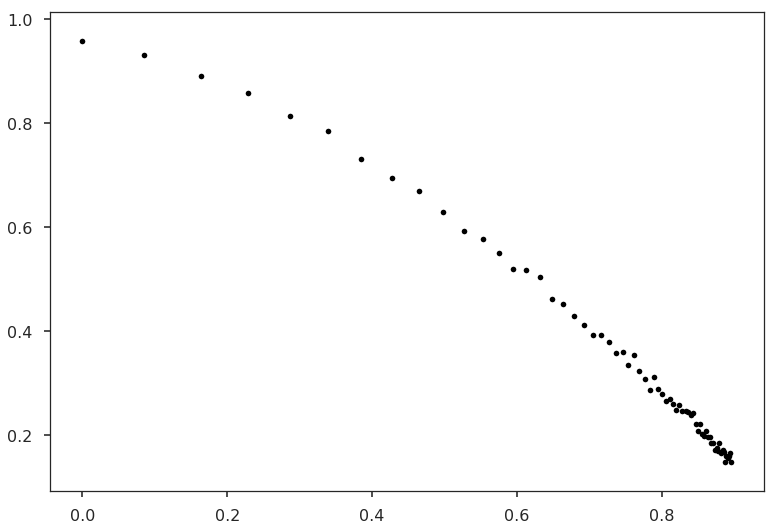

In [3]:
plt.plot(
    avg_no_water_nb[:, 2], 
    avg_no_water_nb[:, 1],
    linestyle='None', 
    marker='.', 
    markevery=100,
    color='k', label='no water')

## with water

In [4]:
data = []
max_size = []
conversion = {}
path = 'with_water'
for f in os.listdir(path):
    if f.endswith('csv') and 'energy' in f:
        d = np.loadtxt(os.path.join(path, f), skiprows=1)
        pid = f.split('_')[2]
        conversion[pid] = d
        header = open(os.path.join(path, f)).readline().split()
        conversion[pid].dtype = [(x, np.float) for x in header]
print(conversion.keys())
for f in os.listdir(path):
    if f.endswith('csv') and f.startswith('nb'):
        print(f)
        d = np.loadtxt(os.path.join(path, f))
        pid = f.split('_')[5]
        max_length = min([d.shape[0], conversion[pid].shape[0]])
        print(max_length, [d.shape[0], conversion[pid].shape[0]])
        d = d[:max_length]
        try:
            d = np.column_stack((d[:, 0], d[:, 1], conversion[pid]['cr_3']))
        except ValueError as ex:
            print(f, d.shape, conversion[pid].shape)
            print(d[0],conversion[pid]['time'][0])
            raise ex
        data.append(d)
        max_size.append(d.shape[0])
max_size = min(max_size)
nb_data = []
for d in data:
    nb_data.append(d[:max_size])
nb_data = np.array(nb_data)
avg_with_water_nb = np.average(nb_data, axis=0)
std_with_water_nb = np.std(nb_data, axis=0)
print(avg_with_water_nb.shape)

dict_keys(['15055', '42816', '26992', '95065', '77771'])
nb_A_DE_p_0.001_15055_0.95_15055_traj.csv
5001 [5001, 5001]
nb_A_DE_p_0.001_95065_0.95_95065_traj.csv
5001 [5001, 5001]
nb_A_DE_p_0.001_42816_0.95_42816_traj.csv
5001 [5001, 5001]
nb_A_DE_p_0.001_26992_0.95_26992_traj.csv
5001 [5001, 5001]
nb_A_DE_p_0.001_77771_0.95_77771_traj.csv
5001 [5001, 5001]
(5001, 3)


# water rev

In [5]:
data = collections.defaultdict(list)
max_size = []
conversion = {}
pid2name = {}
path = 'water_rev'
for f in os.listdir(path):
    if f.endswith('csv') and 'energy' in f:
        d = np.loadtxt(os.path.join(path, f), skiprows=1)
        print(f)
        pid = f.split('_')[4].split('.')[0]
        conversion[pid] = d
        header = open(os.path.join(path, f)).readline().split()
        conversion[pid].dtype = [(x, np.float) for x in header]
print(conversion.keys())
for f in os.listdir(path):
    if f.endswith('csv') and f.startswith('nb'):
        d = np.loadtxt(os.path.join(path, f))
        pid = f.split('_')[6]
        k = float(f.split('_')[4])
        name = '_'.join(f.split('_')[4:5])
        pid2name[pid] = name
        max_length = min([d.shape[0], conversion[pid].shape[0]])
        d = d[:max_length]
        try:
            d = np.column_stack((d[:, 0], d[:, 1], conversion[pid]['cr_3'][:max_length]))
        except ValueError as ex:
            print(max_length)
            print(f, d.shape, conversion[pid].shape)
            raise ex
        data[k] = d
        max_size.append(d.shape[0])

pp_0.001_0.01_energy_37392.csv
pp_0.01_0.01_energy_42639.csv
pp_0.1_0.01_energy_49957.csv
dict_keys(['49957', '37392', '42639'])


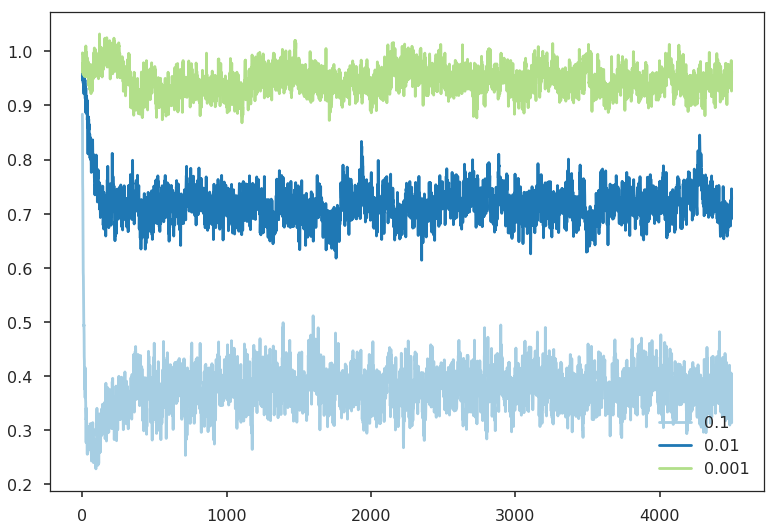

In [7]:
plt.plot(data[0.1][:, 0], data[0.1][:, 1], label='0.1')
plt.plot(data[0.01][:, 0], data[0.01][:, 1], label='0.01')
plt.plot(data[0.001][:, 0], data[0.001][:, 1], label='0.001')
plt.legend(loc=0)

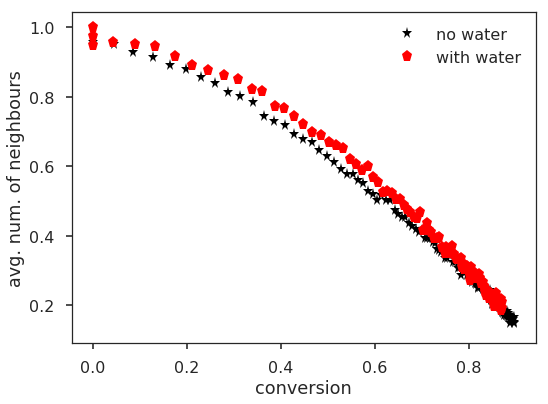

In [8]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(
    avg_no_water_nb[:, 2], 
    avg_no_water_nb[:, 1],
    linestyle='None', 
    marker='*', 
    markevery=50,
    color='k', label='no water')

plt.plot(
    avg_with_water_nb[:, 2], 
    avg_with_water_nb[:, 1],
    linestyle='None', 
    marker='p', 
    markevery=50,
    color='r', label='with water')

#plt.xlim(xmin=500, xmax=5000)
plt.xlabel('conversion')
plt.ylabel('avg. num. of neighbours')
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('avg_num_neigbours_A_DE_0.48_with_water.pdf', dpi=200, tight_layout=True)

0.359636645298
0.441284184422


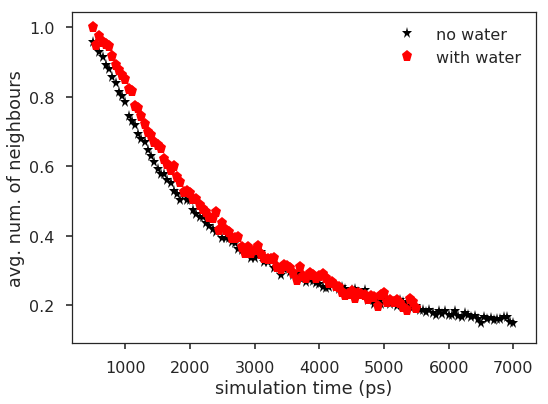

In [11]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(
    avg_no_water_nb[:, 0], 
    avg_no_water_nb[:, 1],
    linestyle='None', 
    marker='*', 
    markevery=50,
    color='k', label='no water')
print(np.average(avg_no_water_nb[:, 1]))
plt.plot(
    avg_with_water_nb[:, 0]+500, 
    avg_with_water_nb[:, 1],
    linestyle='None', 
    marker='p', 
    markevery=50,
    color='r', label='with water')
print(np.average(avg_with_water_nb[:, 1]))
#plt.xlim(xmin=500, xmax=5000)
plt.xlabel('simulation time (ps)')
plt.ylabel('avg. num. of neighbours')
plt.legend(loc=0)
plt.tight_layout()